In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
from datetime import timedelta
import pickle


import warnings
warnings.filterwarnings(action='ignore') 

# 사이킷런
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 회귀
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
pd.set_option('display.max_row', 5000)
pd.set_option('display.max_columns', 100)

from matplotlib import font_manager, rc
import matplotlib
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [6]:
sang_번영=pd.read_excel('C:\\농업기술원\\1차\\2019\\19-20_방울토마토(4)\\19-20_방울토마토_번영농장_권현자(재배기간_2019.07.23~2020.06.10)/19-20작기_방울토마토_번영농장_권현자_양액(2019.07.23~2020.06.02).xlsx')
sang_아리1=pd.read_excel('C:\\농업기술원\\1차\\2019\\19-20_방울토마토(4)\\19-20_방울토마토_아리울_박문신(재배기간_2019.07.23~2020.06.30)/19-20작기_방울토마토_아리울_박문신_양액(2019.07.23~2020.06.30).xlsx')
sang_하늘=pd.read_excel('C:\\농업기술원\\1차\\2019\\19-20_방울토마토(4)\\19-20_방울토마토_하늘농장_유철민(재배기간_2019.07.23~2020.06.28)/19-20작기_방울토마토_하늘농장_유철민_양액(2019.07.23~2020.06.28).xlsx')
sang_화천=pd.read_excel('C:\\농업기술원\\1차\\2019\\19-20_방울토마토(4)\\19-20_방울토마토_화천농장_박성호(재배기간_2019.07.25~2020.06.30)/19-20작기_방울토마토_화천농장_양액_관수량(2019.07.27~2020.06.23).xlsx')
sang_dataset=[]
sang_dataset.append(yang_번영)
sang_dataset.append(yang_아리)
sang_dataset.append(yang_하늘)
sang_dataset.append(yang_화천)

In [20]:
'''
yang_번영=pd.read_excel('C:\\농업기술원\\1차\\2019\\19-20_방울토마토(4)\\19-20_방울토마토_번영농장_권현자(재배기간_2019.07.23~2020.06.10)/19-20작기_방울토마토_번영농장_권현자_양액(2019.07.23~2020.06.02).xlsx')
yang_아리=pd.read_excel('C:\\농업기술원\\1차\\2019\\19-20_방울토마토(4)\\19-20_방울토마토_아리울_박문신(재배기간_2019.07.23~2020.06.30)/19-20작기_방울토마토_아리울_박문신_양액(2019.07.23~2020.06.30).xlsx')
yang_하늘=pd.read_excel('C:\\농업기술원\\1차\\2019\\19-20_방울토마토(4)\\19-20_방울토마토_하늘농장_유철민(재배기간_2019.07.23~2020.06.28)/19-20작기_방울토마토_하늘농장_유철민_양액(2019.07.23~2020.06.28).xlsx')
yang_화천=pd.read_excel('C:\\농업기술원\\1차\\2019\\19-20_방울토마토(4)\\19-20_방울토마토_화천농장_박성호(재배기간_2019.07.25~2020.06.30)/19-20작기_방울토마토_화천농장_양액_관수량(2019.07.27~2020.06.23).xlsx')
yang_dataset=[]
yang_dataset.append(yang_번영)
yang_dataset.append(yang_아리)
yang_dataset.append(yang_하늘)
yang_dataset.append(yang_화천)
'''


In [22]:
## yang Save pickle
'''
with open("C:\\농업기술원\\1차\\2019\\19-20_방울토마토(4)\\yang_dataset.pickle","wb") as fw:
    pickle.dump(yang_dataset, fw)
'''

In [24]:
## yang Load pickle
with open("C:\\농업기술원\\1차\\2019\\19-20_방울토마토(4)\\yang_dataset.pickle","rb") as fr:
    yang_dataset = pickle.load(fr)
yang_list=['번영','아리','하늘','화천']

# 전처리

In [32]:
yang_data = yang_dataset[1][['date','Irrigation (dripper) [ml]','Number of irrigation starts based on radiation sum','Total number of irrigation starts']]

In [37]:
yang_data['n_date']=yang_data['date'].apply(lambda x : x.strftime('%Y-%m-%d'))

In [38]:
def n_date(d):
    myDatetimeStr = d
    myDatetime = datetime.strptime(myDatetimeStr, '%Y-%m-%d')
    return myDatetime

In [41]:
yang_data['date']=yang_data['n_date'].apply(n_date)
del yang_data['n_date']

In [59]:
g_yang_data=yang_data.groupby(['date'])['Number of irrigation starts based on radiation sum','Total number of irrigation starts'].agg('max').reset_index()
g_yang_data.head(5)

# 주차 추가

In [59]:
# 주차 추가
def add_weeknum(sang_df):
    sang_df['diff']=sang_df['WeekNum'].shift(1)
    sang_df['diff2']=sang_df['WeekNum']-sang_df['diff']
    
    num=-1
    test_week=[]
    for i in range(len(sang_df)):
        if sang_df['diff2'].loc[i]!=0:
            num+=1
            test_week.append(num)
        else:
            test_week.append(num)
    del sang_df['diff']
    del sang_df['diff2']
    return test_week

In [59]:
g_yang_data['주차']=add_weeknum(sang_data1)

In [59]:
sang_data1=sang_data1[['Date','Sample','주차','생장길이']]

,date,Number of irrigation starts based on radiation sum,Total number of irrigation starts
0,2019-07-23,43,71
1,2019-07-24,16,19
2,2019-07-25,16,19
3,2019-07-26,9,12
4,2019-07-27,5,12


In [70]:
def biger(df):
    if df['Number of irrigation starts based on radiation sum']>=df['Total number of irrigation starts']:
        return df['Number of irrigation starts based on radiation sum']
    else:
        return df['Total number of irrigation starts']
g_yang_data['big']=g_yang_data.apply(biger,axis=1)

In [68]:
g_yang_data['tot_yang']=g_yang_data['big']*70.9

In [72]:
del g_yang_data['Number of irrigation starts based on radiation sum']
del g_yang_data['Total number of irrigation starts']

In [74]:
g_yang_data.head(5)

,date,tot_yang,big
0,2019-07-23,5033.9,71
1,2019-07-24,1347.1,19
2,2019-07-25,1347.1,19
3,2019-07-26,850.8,12
4,2019-07-27,850.8,12


(array([737249., 737256., 737263., 737270., 737277., 737284., 737291.,
        737298., 737305., 737312., 737319., 737326., 737333., 737340.,
        737347., 737354., 737361., 737368., 737375., 737382., 737389.,
        737396., 737403., 737410., 737417., 737424., 737431., 737438.,
        737445., 737452., 737459., 737466., 737473., 737480., 737487.,
        737494., 737501., 737508., 737515., 737522., 737529., 737536.,
        737543., 737550., 737557., 737564., 737571., 737578., 737585.,
        737592., 737599., 737606., 737613., 737620.]),
 <a list of 54 Text major ticklabel objects>)

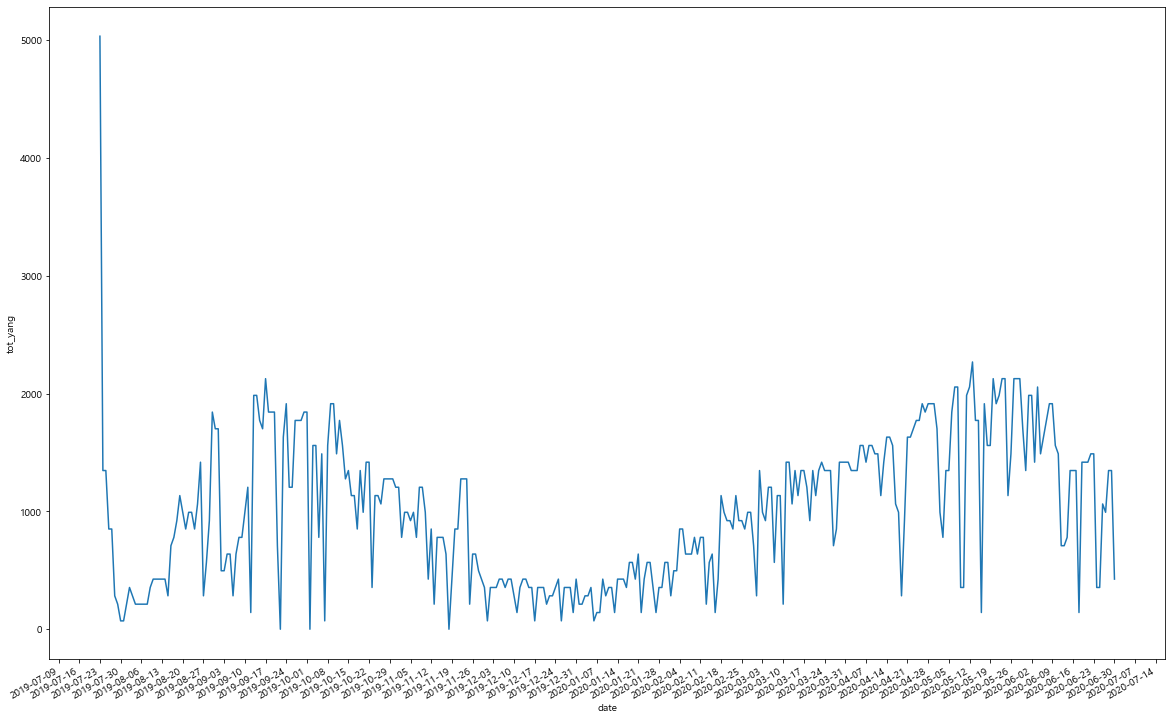

In [93]:
##### import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(20, 12))
sns.lineplot(data=g_yang_data,x='date',y='tot_yang')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xticks(rotation=30,ha='right')

In [82]:
g_yang_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      344 non-null    datetime64[ns]
 1   tot_yang  344 non-null    float64       
 2   big       344 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.2 KB
